# **AP157 Module C Lab Assignment**

## Module C1: Networks

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: The sample social network used is taken from https://nauczanki.wordpress.com/2014/11/10/social-network-analysis-basics-in-300-words-dalmooc-assignment-week-3/, which in turn is taken from an unspecified MOOC assignment.

### Student Information

_Full Name (Last Name, First Name)_: JAVIER, MICHAEL ADRIAN \
_Student No._: 2019-04177\
_Section_: TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: 05/23/2024

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: MICHAEL ADRIAN JAVIER**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/30
* Part 4 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For all parts of this assignment,  refer to the diagram of the sample social network in the Google Drive "Datasets" Folder (https://drive.google.com/file/d/1DkAK44GfocX0bmlSfK5Q6cbYXAUkixyj/view?usp=drive_link)

#### PART 1 - Network generation and characteristics *(30 points)*

1. Using the Python package networkx, define a network that represents the social network of friends in the diagram. *(15 points)*  

2. Calculate the ff. network characteristics: *(15 points; 5 points each)*
- Diameter
- Density
- Average Degree

3. Create the degree distribution plot and briefly discuss what it tells us about this social network. *(10 points)*

First, we load in the package ```networkx```. 

In [1]:
import networkx as nx 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["font.family"] = "Arial"

Then, we have to recreate the network shown below in Python. 
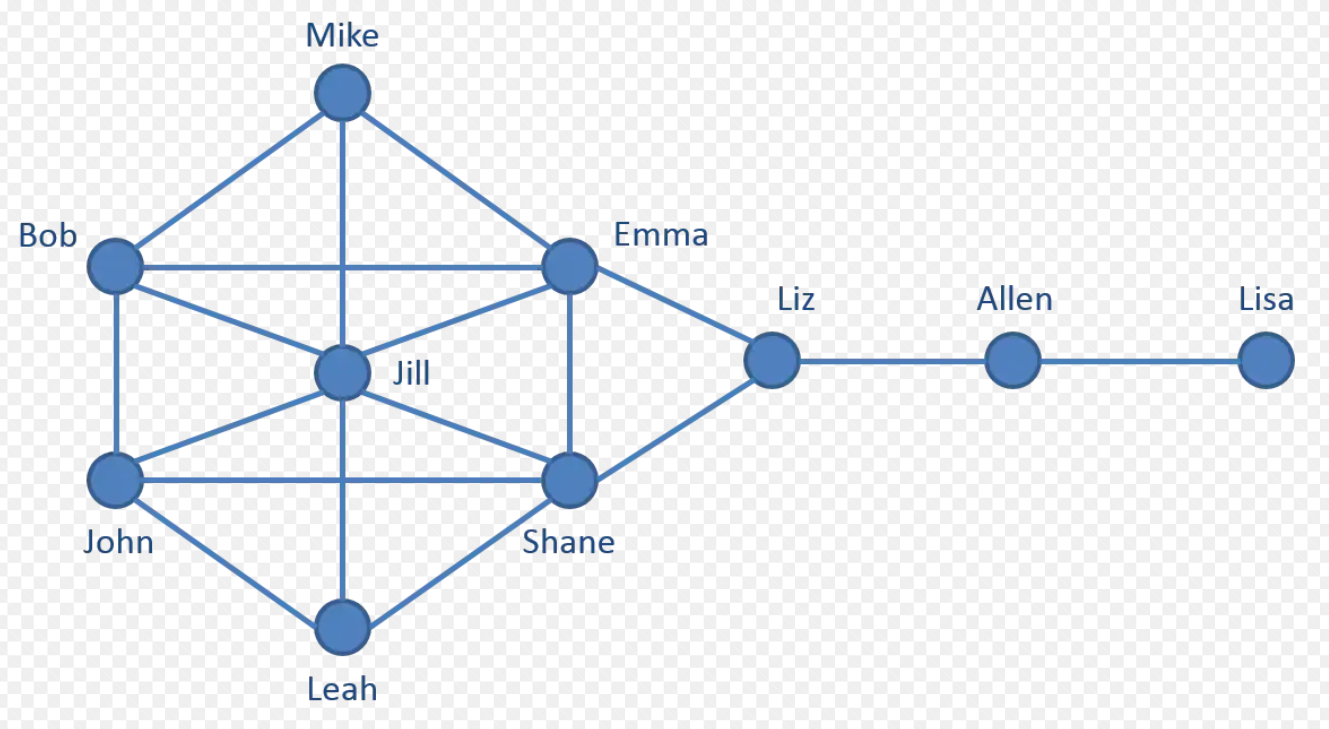

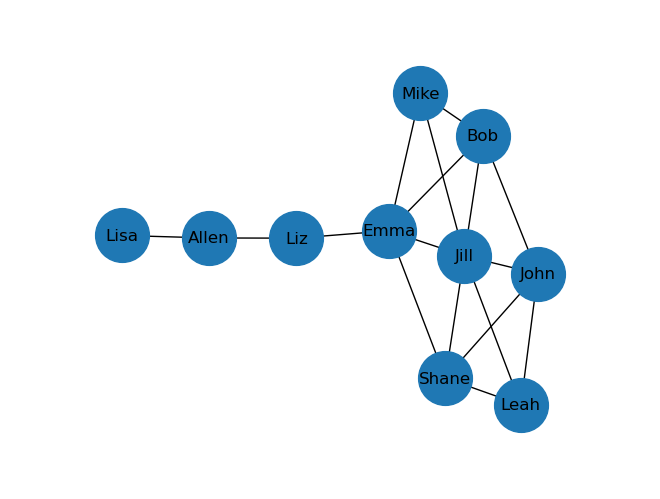

In [2]:
# Make the graph class
G = nx.Graph()

ns = ['Mike', 'Bob', 'Emma', 'Jill', 'Liz', 'Allen', 'Lisa', 'John', 'Shane', 'Leah']

for i in range(len(ns)):
    G.add_node(ns[i])

# Mike connections
G.add_edge(ns[0], ns[1]) # mike bob
G.add_edge(ns[0], ns[2]) # mike emma
G.add_edge(ns[0], ns[3]) # mike jill

# Emma-Lisa connection
G.add_edge(ns[2], ns[1]) # emma bob
G.add_edge(ns[2], ns[4]) # emma liz
G.add_edge(ns[4], ns[5]) # liz allen
G.add_edge(ns[5], ns[6]) # allen lisa
G.add_edge(ns[2], ns[8])

# Jill connection
G.add_edge(ns[3], ns[1]) # jill bob 
G.add_edge(ns[3], ns[7]) # jill john
G.add_edge(ns[3], ns[2]) # jill emma
G.add_edge(ns[3], ns[8]) # jill shane
G.add_edge(ns[3], ns[9]) # jill lea

# Bob connection
G.add_edge(ns[7], ns[1]) # john bob
G.add_edge(ns[7], ns[8]) # john shane

# Leah connection
G.add_edge(ns[9], ns[7]) # lea john
G.add_edge(ns[9], ns[8]) # lea shane

nx.draw_kamada_kawai(G, with_labels=True, node_size=1500)
plt.margins(0.2)
plt.show()
# np.random.seed(2)

We can also make this shorter by sorting all of the connections in a list. We're also gonna make 

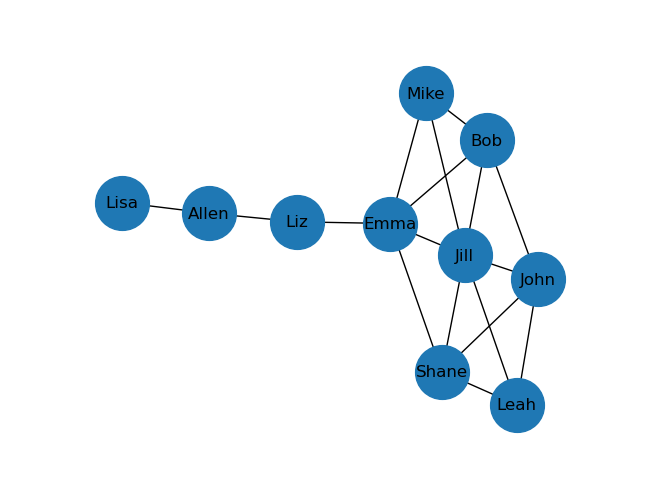

In [3]:
# Make the graph class
H = nx.Graph()

ns = ['Mike', 'Bob', 'Emma', 'Jill', 'Liz', 'Allen', 'Lisa', 'John', 'Shane', 'Leah']

for i in range(len(ns)):
    H.add_node(ns[i])

# Connections
conn_list = [(ns[0], ns[1]), (ns[0], ns[2]), (ns[0], ns[3]), (ns[2], ns[1]), (ns[2], ns[4]), (ns[4], ns[5]), (ns[5], ns[6]), (ns[2], ns[8]), (ns[3], ns[1]), \
         (ns[3], ns[7]), (ns[3], ns[2]), (ns[3], ns[8]), (ns[3], ns[9]), (ns[7], ns[1]), (ns[7], ns[8]), (ns[9], ns[7]), (ns[9], ns[8])]
conns = nx.from_edgelist(conn_list)

nx.draw_kamada_kawai(conns, with_labels=True, node_size=1500,)
plt.margins(0.2)
plt.show()

We can find out the diamerer and density of the graph using the functions: 

- ```nx.diameter```
- ```nx.density```

In [4]:
nx.diameter(G)

5

In [5]:
nx.density(G)

0.37777777777777777

When you type ```nx.degree``` in ```NetworkX```, we automatically get the degree for each node and we don't have to get it for every single one. 

In [6]:
nx.degree(G)

DegreeView({'Mike': 3, 'Bob': 4, 'Emma': 5, 'Jill': 6, 'Liz': 2, 'Allen': 2, 'Lisa': 1, 'John': 4, 'Shane': 4, 'Leah': 3})

However, the object that ```nx.degree``` gives is a NetworkX DegreeView object. Thus, we have to make it into a DataFrame first, and take the mean of the degrees.

In [7]:
np.mean(pd.DataFrame(nx.degree(G)).iloc[:, 1])

3.4

In [8]:
G.degree(ns[0])

3

(array([1., 0., 2., 0., 2., 0., 3., 0., 1., 1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

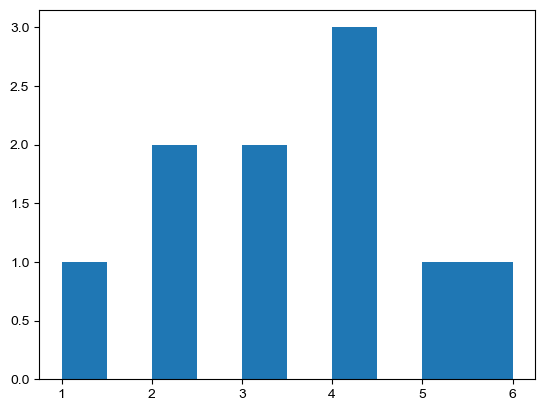

In [9]:
degs = [G.degree(node) for node in G.nodes()]
plt.hist(degs)

We can even look at the degree histogram using ```nx.degree_histogram```!

In [10]:
nx.degree_histogram(G)

[0, 1, 2, 2, 3, 1, 1]

Text(0.5, 0, 'Degree')

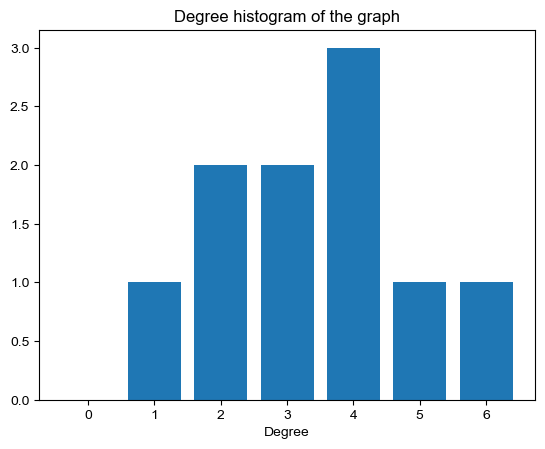

In [11]:
plt.bar(np.arange(0, 7, 1), nx.degree_histogram(G))
plt.title('Degree histogram of the graph')
plt.xlabel('Degree')

#### PART 2 - Centrality Measures *(30 points)*

Generate a table of centrality measures per node. Columns are:
- Name
- Degree Centrality
- Betweenness Centrality
- Closeness Centrality

Briefly discuss who are the most "central" people in the social network and why.

In [12]:
cen_deg = nx.degree_centrality(G)
cen_bet = nx.betweenness_centrality(G)
cen_clo = nx.closeness_centrality(G)

In [13]:
cens = [cen_deg, cen_bet, cen_clo]
cen_df = pd.DataFrame.from_dict(cens)
cen_df = cen_df.T
cen_df.columns = ['Degree centrality', 'Betweenness centrality', 'Closeness centrality']
cen_df

,Degree centrality,Betweenness centrality,Closeness centrality
Mike,0.333333,0.000000,0.500000
Bob,0.444444,0.050926,0.529412
Emma,0.555556,0.523148,0.642857
Jill,0.666667,0.171296,0.600000
Liz,0.222222,0.388889,0.500000
Allen,0.222222,0.222222,0.375000
Lisa,0.111111,0.000000,0.281250
John,0.444444,0.023148,0.450000
Shane,0.444444,0.092593,0.529412
Leah,0.333333,0.000000,0.428571


#### PART 3 - Identify communities *(40 points)*

1. Identify communities in the social network using *(30 points)*:
- Louvain community detection algorithm
- Any other community detection algorithm of your choice

2. Calculate the modularity of the partitions from the two community detection algorithms. *(10 points)*

Briefly describe the algorithm you used and compare the results from the two algorithms.

In [15]:
from community import community_louvain

comms = community_louvain.best_partition(G)
comms

{'Mike': 0,
 'Bob': 0,
 'Emma': 0,
 'Jill': 1,
 'Liz': 2,
 'Allen': 2,
 'Lisa': 2,
 'John': 1,
 'Shane': 1,
 'Leah': 1}

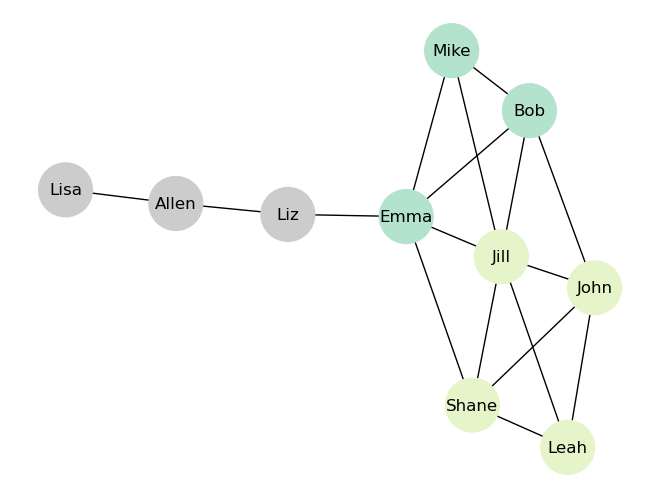

In [33]:
nx.draw_kamada_kawai(conns, with_labels=True, node_size=1500, node_color=list(comms.values()), cmap='Pastel2')

Now, let's see other partition techniques. Let's try the greedy communities technique.

In [44]:
comms1 = nx.community.greedy_modularity_communities(G, 3)
comms1

[frozenset({'Bob', 'Emma', 'Jill', 'Mike'}),
 frozenset({'Allen', 'Lisa', 'Liz'}),
 frozenset({'John', 'Leah', 'Shane'})]

and we see that:
- Bob, Emma, Jill, and Mike
- Allen, Lisa, Liz
- John, Leah, Shane
belong in the same communities!

This is quite different from Louvain communities.

Let's try to make a random tree. A random tree is formed by a stochastic process. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


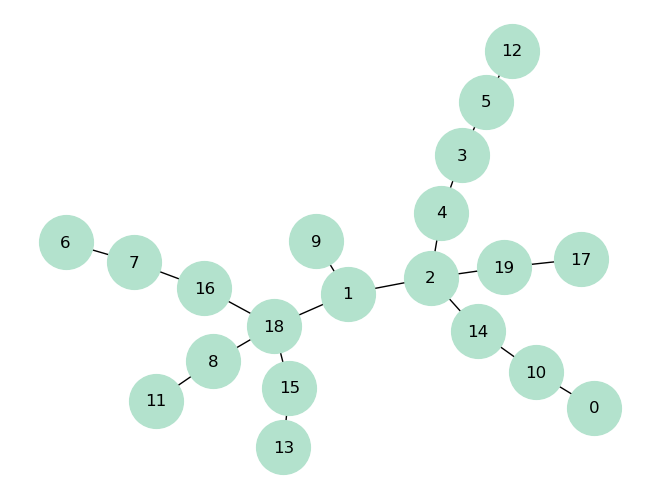

In [29]:
rt = nx.random_tree(20)
import seaborn as sns
np.random.seed(50)
nx.draw_kamada_kawai(rt, with_labels=True, node_size=1500, node_color=sns.color_palette('Pastel2')[0])

Let's try to partition it!

In [30]:
random_comms = community_louvain.best_partition(rt)

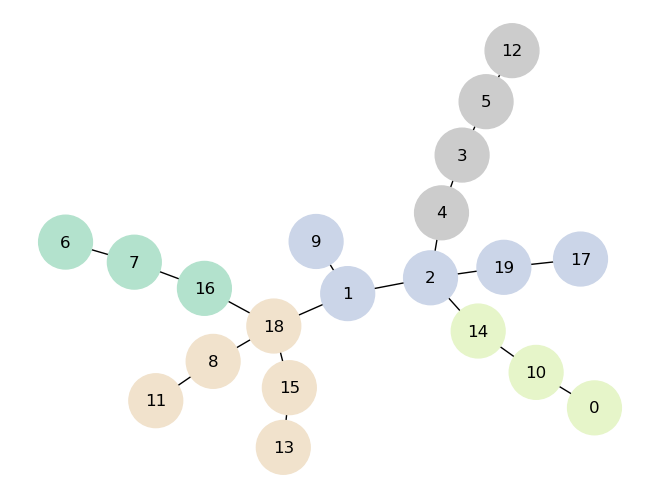

In [31]:
nx.draw_kamada_kawai(rt, with_labels=True, node_size=1500, node_color=list(random_comms.values()), cmap='Pastel2')

Here, I would assume that maybe all of the branches are all in one community, or three of the branches on the left are a community and all three on the right! However, we are proven wrong.